# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [31]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from Weather_API import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [33]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [38]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | faanui
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | the valley
Processing Record 6 of Set 1 | lompoc
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | laguna
Processing Record 9 of Set 1 | martapura
Processing Record 10 of Set 1 | chuy
Processing Record 11 of Set 1 | codrington
Processing Record 12 of Set 1 | empalme
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | oktyabrskoye
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | bucak
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | ahipara
Processing Record 20 of Set 1 | norsup
Processing Record 21 of Set 1 | san vicente
Processing Record 22 of Set 1 | omboue
Processing Record

Processing Record 39 of Set 4 | yunjinghong
City not found. Skipping...
Processing Record 40 of Set 4 | preobrazheniye
Processing Record 41 of Set 4 | makakilo city
Processing Record 42 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 43 of Set 4 | goundam
Processing Record 44 of Set 4 | bud
Processing Record 45 of Set 4 | contai
Processing Record 46 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 47 of Set 4 | qaanaaq
Processing Record 48 of Set 4 | guerrero negro
Processing Record 49 of Set 4 | barrow
Processing Record 0 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 1 of Set 5 | namanga
Processing Record 2 of Set 5 | kalmunai
Processing Record 3 of Set 5 | jaroslaw
Processing Record 4 of Set 5 | dalvik
Processing Record 5 of Set 5 | hithadhoo
Processing Record 6 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 7 of Set 5 | mount gambier
Processing Record 8 of Set 5 | quatre cocos
Processing Record 9 of S

Processing Record 25 of Set 8 | elat
Processing Record 26 of Set 8 | coahuayana
Processing Record 27 of Set 8 | charyshskoye
Processing Record 28 of Set 8 | revelstoke
Processing Record 29 of Set 8 | anadyr
Processing Record 30 of Set 8 | margate
Processing Record 31 of Set 8 | camacari
Processing Record 32 of Set 8 | hunza
City not found. Skipping...
Processing Record 33 of Set 8 | sabzevar
Processing Record 34 of Set 8 | ajdabiya
Processing Record 35 of Set 8 | veraval
Processing Record 36 of Set 8 | cao bang
Processing Record 37 of Set 8 | rio gallegos
Processing Record 38 of Set 8 | olga
Processing Record 39 of Set 8 | pevek
Processing Record 40 of Set 8 | isangel
Processing Record 41 of Set 8 | price
Processing Record 42 of Set 8 | amapa
Processing Record 43 of Set 8 | george
Processing Record 44 of Set 8 | shubarshi
Processing Record 45 of Set 8 | riyadh
Processing Record 46 of Set 8 | klaksvik
Processing Record 47 of Set 8 | porterville
Processing Record 48 of Set 8 | yerbogache

Processing Record 8 of Set 12 | klyuchi
Processing Record 9 of Set 12 | san isidro
Processing Record 10 of Set 12 | polson
Processing Record 11 of Set 12 | bealanana
Processing Record 12 of Set 12 | aksarka
Processing Record 13 of Set 12 | hami
Processing Record 14 of Set 12 | galesburg
Processing Record 15 of Set 12 | limoux
Processing Record 16 of Set 12 | aguie
Processing Record 17 of Set 12 | changli
Processing Record 18 of Set 12 | gidole
Processing Record 19 of Set 12 | pandan
Processing Record 20 of Set 12 | susurluk
Processing Record 21 of Set 12 | nicoya
Processing Record 22 of Set 12 | buckeye
Processing Record 23 of Set 12 | homer
Processing Record 24 of Set 12 | oparino
Processing Record 25 of Set 12 | pho chai
Processing Record 26 of Set 12 | mandali
Processing Record 27 of Set 12 | san jeronimo
Processing Record 28 of Set 12 | xuddur
Processing Record 29 of Set 12 | la ronge
Processing Record 30 of Set 12 | farah
Processing Record 31 of Set 12 | colomi
Processing Record 3

In [39]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [41]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,6.06,56,75,3.60,CL,1680109784
1,longyearbyen,78.2186,15.6401,-12.09,79,40,1.03,SJ,1680109785
2,faanui,-16.4833,-151.7500,27.78,74,86,4.23,PF,1680109785
3,mataura,-46.1927,168.8643,5.27,84,36,1.77,NZ,1680109785
4,the valley,18.2170,-63.0578,27.08,69,20,6.17,AI,1680109785


In [50]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [51]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,6.06,56,75,3.60,CL,1680109784
1,longyearbyen,78.2186,15.6401,-12.09,79,40,1.03,SJ,1680109785
2,faanui,-16.4833,-151.7500,27.78,74,86,4.23,PF,1680109785
3,mataura,-46.1927,168.8643,5.27,84,36,1.77,NZ,1680109785
4,the valley,18.2170,-63.0578,27.08,69,20,6.17,AI,1680109785


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

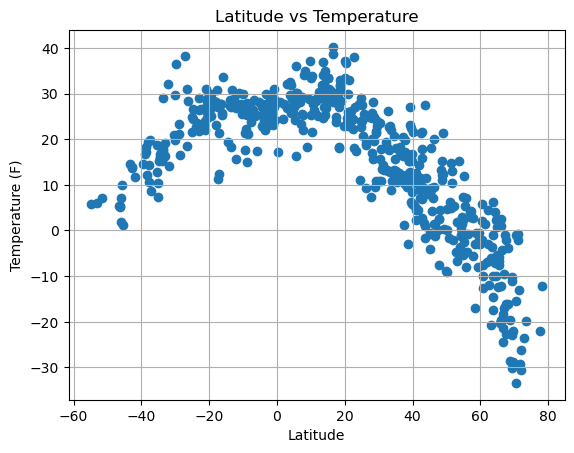

In [60]:
#Build Scatter Plot for latitude vs temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.scatter(x,y)
plt.grid()
#incorporate the other graph properties
plt.title(f"Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
#Save the figure
plt.savefig("output_data/Fig1.png")
#Show Plot
plt.show()

#### Latitude Vs. Humidity

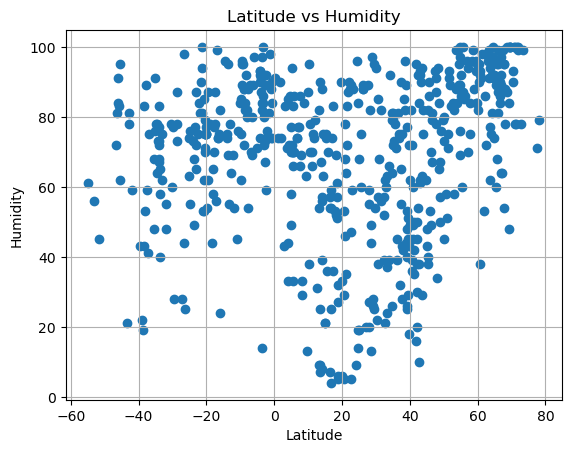

In [61]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.scatter(x,y)
plt.grid()
# Incorporate the other graph properties
plt.title(f"Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

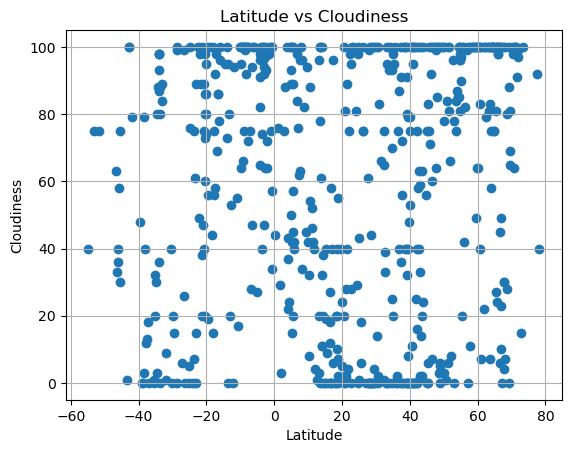

In [62]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.scatter(x,y)
plt.grid()
# Incorporate the other graph properties
plt.title(f"Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

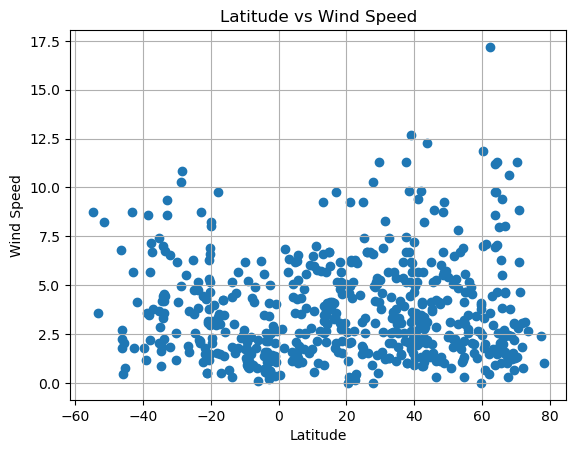

In [63]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.scatter(x,y)
plt.grid()

# Incorporate the other graph properties
plt.title(f"Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-squared is: -0.8955750266188621


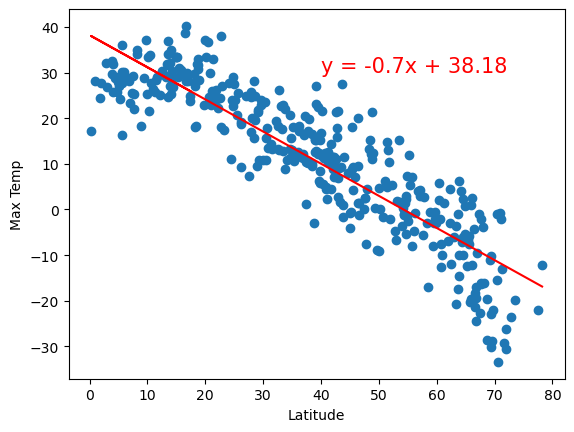

In [168]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):

# Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))       
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Max Temp")
    print(f"The r-squared is: {rvalue}")
plt.show()

x_values = north_hem_df ["Lat"]
y_values = north_hem_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (40,30))   

In [81]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hem_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
south_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,6.06,56,75,3.60,CL,1680109784
2,faanui,-16.4833,-151.7500,27.78,74,86,4.23,PF,1680109785
3,mataura,-46.1927,168.8643,5.27,84,36,1.77,NZ,1680109785
7,martapura,-3.4167,114.8500,26.05,100,100,0.51,ID,1680109786
8,chuy,-33.6971,-53.4616,29.11,40,0,4.17,UY,1680109786


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8955750266188621


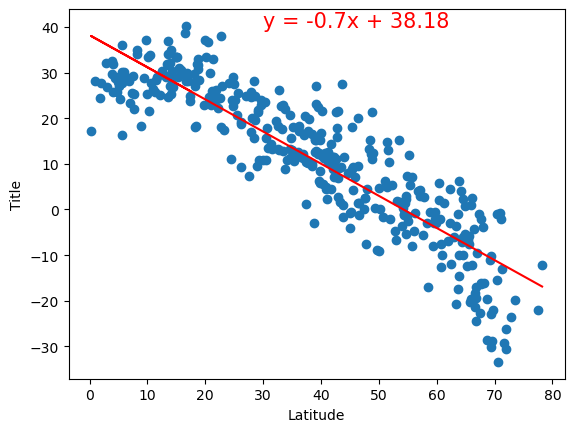

In [130]:
# Linear regression on Northern Hemisphere
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):

# Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))       
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
plt.show()

x_values = north_hem_df ["Lat"]
y_values = north_hem_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (30,40)) 


The r-squared is: 0.6810217599568852


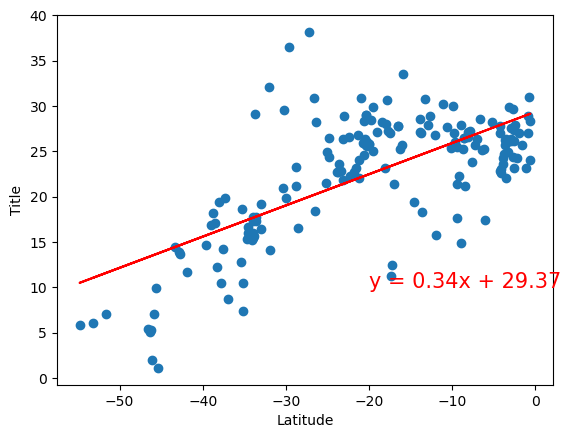

In [145]:
x_values = south_hem_df ["Lat"]
y_values = south_hem_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-20,10)) 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.40772068898489006


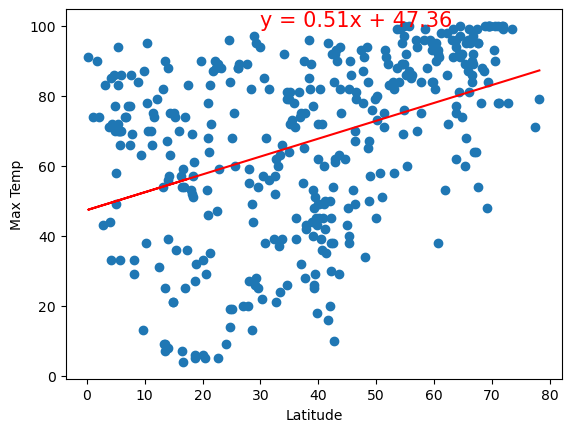

In [129]:
# Northern Hemisphere
x_values = north_hem_df ["Lat"]
y_values = north_hem_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (30,100)) 

The r-squared is: 0.35989461816170076


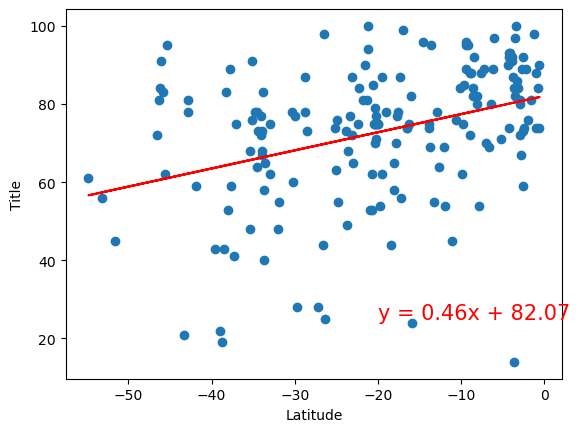

In [143]:
# Southern Hemisphere
x_values = south_hem_df ["Lat"]
y_values = south_hem_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-20,25)) 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.2563270090785847


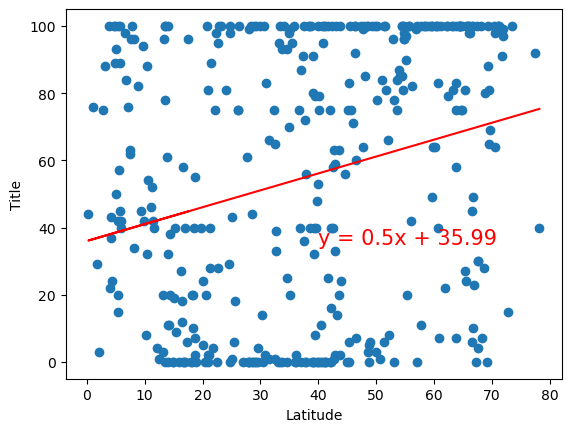

In [140]:
# Northern Hemisphere
x_values = north_hem_df ["Lat"]
y_values = north_hem_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,35))

The r-squared is: 0.414059026695283


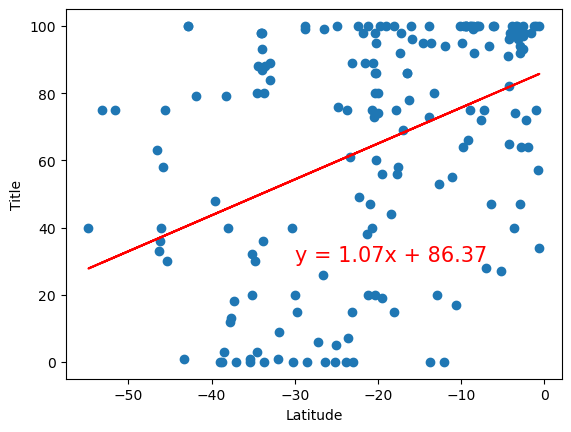

In [141]:
# Southern Hemisphere
x_values = south_hem_df ["Lat"]
y_values = south_hem_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.030486647439246724


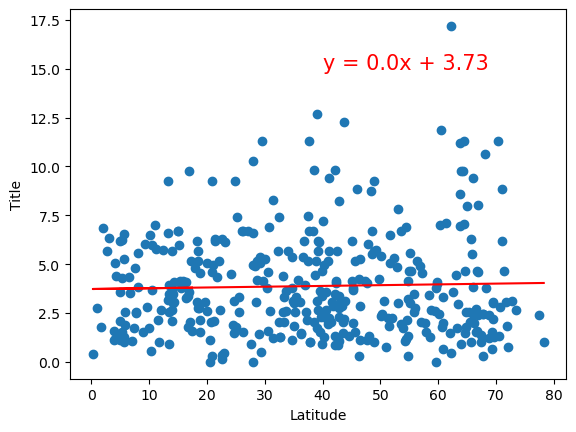

In [155]:
# Northern Hemisphere
x_values = north_hem_df ["Lat"]
y_values = north_hem_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (40,15))

The r-squared is: -0.375602999843027


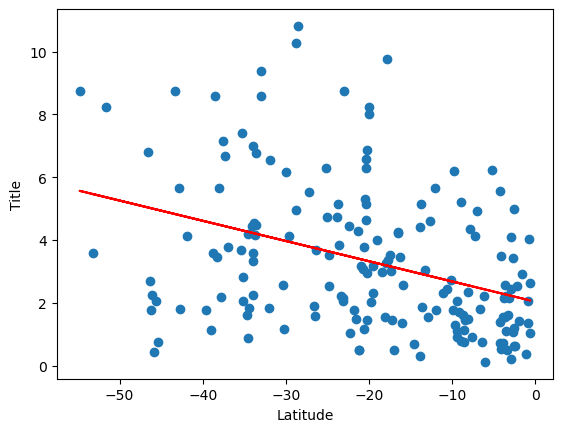

In [162]:
# Southern Hemisphere
x_values = south_hem_df ["Lat"]
y_values = south_hem_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE